In [93]:
import pandas as pd

In [103]:
dados = pd.read_csv('Energy_consumption.csv')

In [105]:
dados['Timestamp'] = pd.to_datetime(dados['Timestamp'])

In [106]:
dados

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [108]:
dias_semana_para_numero = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

HVAC_para_numero = {
    'On': 1,
    'Off': 0
}

lightning_para_numero = {
    'On': 1,
    'Off': 0
}

holiday_para_numero = {
    'Yes': 1,
    'No': 0
}

In [110]:
dados['HVACUsage'] = [HVAC_para_numero[mode] for mode in dados['HVACUsage']]

In [111]:
dados['LightingUsage'] = [lightning_para_numero[mode] for mode in dados['LightingUsage']]

In [113]:
dados['Holiday'] = [holiday_para_numero[condition] for condition in dados['Holiday']]

In [116]:
dados['DayOfWeek'] = [dias_semana_para_numero[condition] for condition in dados['DayOfWeek']]

In [118]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   int64         
 6   LightingUsage      1000 non-null   int64         
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   int64         
 9   Holiday            1000 non-null   int64         
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 86.1 KB


In [120]:
from dtype_diet import report_on_dataframe

In [121]:
report_on_dataframe(dados)

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Timestamp,datetime64[ns],None,3.96875,NaN,NaN,NaN
Temperature,float64,None,3.96875,NaN,NaN,NaN
Humidity,float64,None,3.96875,NaN,NaN,NaN
SquareFootage,float64,None,3.96875,NaN,NaN,NaN
Occupancy,int64,int8,3.96875,0.550781,3.417969,86.122047
HVACUsage,int64,int8,3.96875,0.550781,3.417969,86.122047
LightingUsage,int64,int8,3.96875,0.550781,3.417969,86.122047
RenewableEnergy,float64,None,3.96875,NaN,NaN,NaN
DayOfWeek,int64,int8,3.96875,0.550781,3.417969,86.122047


In [123]:
colunas_para_alterar = ['Occupancy', 'HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
dados[colunas_para_alterar] = dados[colunas_para_alterar].astype('int8')

Timestamp            datetime64[ns]
Temperature                 float64
Humidity                    float64
SquareFootage               float64
Occupancy                      int8
HVACUsage                      int8
LightingUsage                  int8
RenewableEnergy             float64
DayOfWeek                      int8
Holiday                        int8
EnergyConsumption           float64
dtype: object


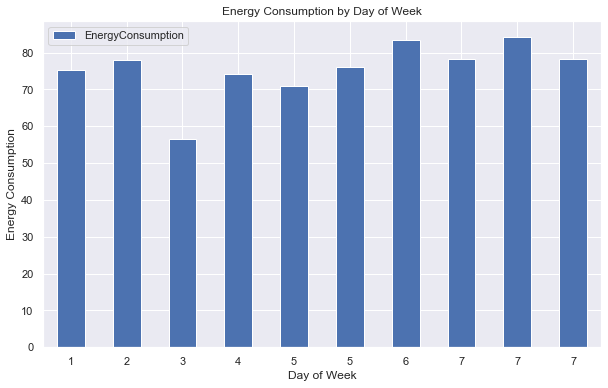

In [243]:
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o seu DataFrame
# Selecionando as colunas desejadas
dados_plot = dados[['EnergyConsumption', 'DayOfWeek']].head(10).sort_values('DayOfWeek',ascending = True)

# Plotando
dados_plot.plot(x='DayOfWeek', y='EnergyConsumption', kind='bar', rot=0, figsize=(10, 6))
plt.title('Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.show()


In [135]:
dados.corr()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,1.000000,0.015110,0.008777,0.042095,-0.026153,-0.009583,0.012026,0.055168,0.043980,0.020292,0.034407
Temperature,0.015110,1.000000,-0.034032,0.004551,-0.003490,0.001237,0.009446,-0.001350,0.010398,0.026893,0.696410
Humidity,0.008777,-0.034032,1.000000,-0.014651,0.004766,-0.094017,-0.022207,0.002052,0.028940,-0.033733,-0.093583
SquareFootage,0.042095,0.004551,-0.014651,1.000000,0.009696,0.018244,-0.016915,0.022196,-0.002762,-0.027951,-0.001129
Occupancy,-0.026153,-0.003490,0.004766,0.009696,1.000000,0.012674,-0.012062,0.013680,0.000038,0.029863,0.186580
HVACUsage,-0.009583,0.001237,-0.094017,0.018244,0.012674,1.000000,-0.050303,0.016219,-0.075241,0.033020,0.286464
LightingUsage,0.012026,0.009446,-0.022207,-0.016915,-0.012062,-0.050303,1.000000,-0.029295,-0.023595,0.042913,0.093423
RenewableEnergy,0.055168,-0.001350,0.002052,0.022196,0.013680,0.016219,-0.029295,1.000000,0.059786,-0.035892,0.081160
DayOfWeek,0.043980,0.010398,0.028940,-0.002762,0.000038,-0.075241,-0.023595,0.059786,1.000000,0.011834,-0.010524
Holiday,0.020292,0.026893,-0.033733,-0.027951,0.029863,0.033020,0.042913,-0.035892,0.011834,1.000000,0.056676


<AxesSubplot:xlabel='Holiday,DayOfWeek'>

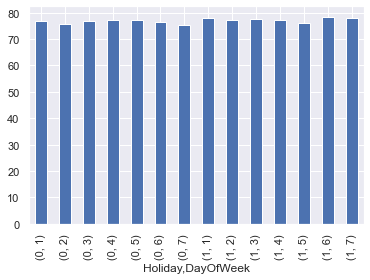

In [252]:
dados.groupby(['Holiday', 'DayOfWeek'])['EnergyConsumption'].mean().plot(kind = 'bar')


<AxesSubplot:xlabel='DayOfWeek'>

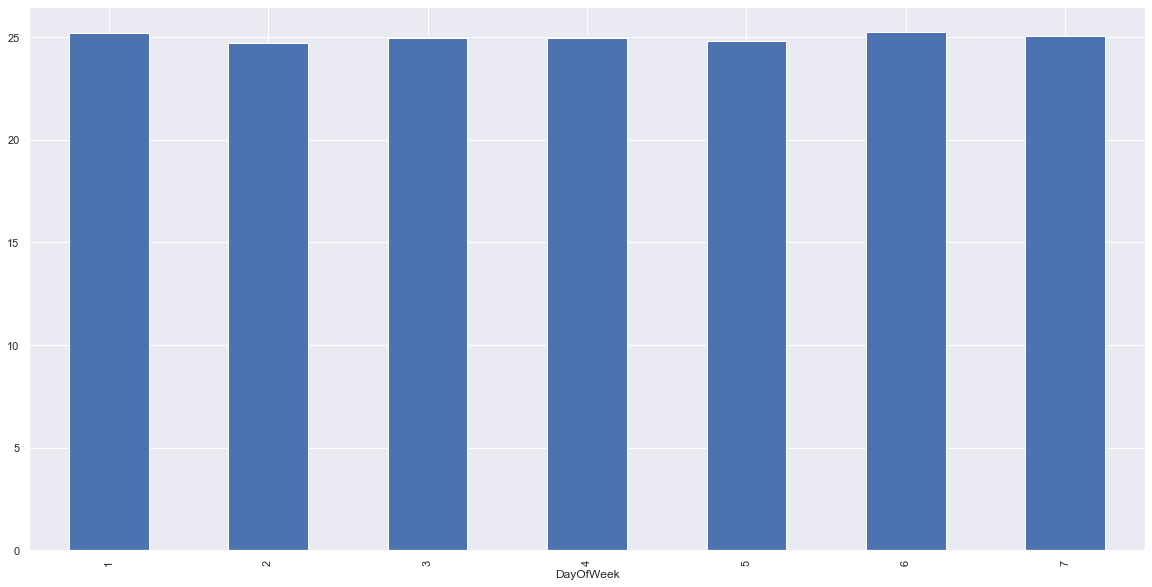

In [144]:
dados.groupby(['DayOfWeek'])['Temperature'].mean().plot(kind = 'bar')

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [200]:


X = dados[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']]
y = dados['EnergyConsumption']

In [253]:
dados

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,6,0,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,7,0,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,3,0,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732
...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,0,0,21.194696,6,0,82.306692
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,0,1,25.748176,2,1,66.577320
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,0,1,0.297079,5,1,72.753471


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [226]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [227]:
y_pred = regressor.predict(X_test)

In [228]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 26.161687519059143
R-squared: 0.6005841644032744


Equação da Reta:
EnergyConsumption = 22.6399 + 1.9997 * Temperature + -0.0366 * Humidity + -0.0004 * SquareFootage + 0.5007 * Occupancy + 4.5352 * HVACUsage + 1.6558 * LightingUsage + 0.0941 * RenewableEnergy 
Mean Squared Error: 26.161687519059143
R-squared: 0.6005841644032744


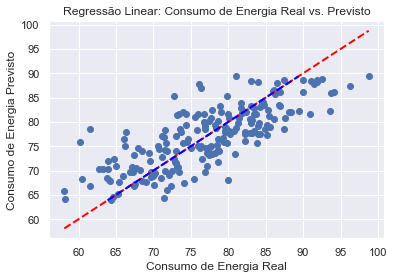

In [230]:
# Criar e treinar o modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Coeficientes da reta
coeficientes = regressor.coef_
intercepto = regressor.intercept_

# Imprimir a equação da reta
equacao_reta = f'EnergyConsumption = {intercepto:.4f} + '
for i, coeficiente in enumerate(coeficientes):
    equacao_reta += f'{coeficiente:.4f} * {X.columns[i]} + '

# Remover o último sinal de '+'
equacao_reta = equacao_reta[:-2]

print(f'Equação da Reta:\n{equacao_reta}')

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizar a regressão em um gráfico
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], linestyle='--', color='blue', linewidth=2)# Adicionando a linha de 45 graus
plt.xlabel("Consumo de Energia Real")
plt.ylabel("Consumo de Energia Previsto")
plt.title("Regressão Linear: Consumo de Energia Real vs. Previsto")
plt.show()

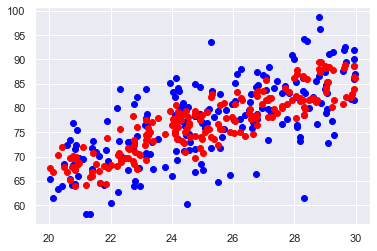

In [231]:
X_test_numpy = X_test['Temperature'].to_numpy()
y_test_numpy = y_test.to_numpy()


# Usar X_test_numpy e y_test_numpy nos gráficos
plt.scatter(X_test_numpy, y_test_numpy, label='Real', color='blue')
plt.scatter(X_test_numpy, y_pred, label='predict', color='red')

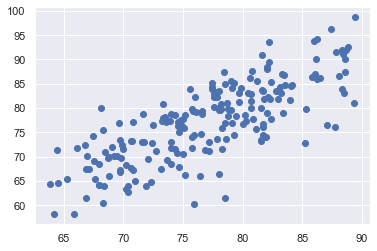

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)

In [233]:
residual = y_test - y_pred

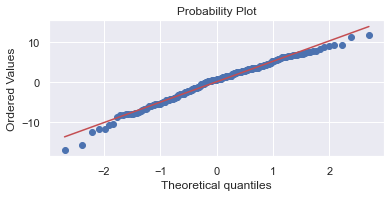

In [234]:
import scipy as sp
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

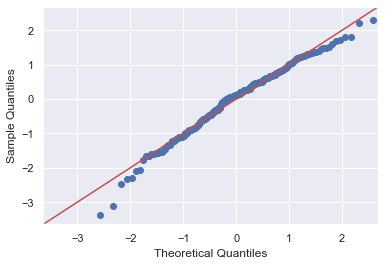

In [235]:
#QQ plot
import statsmodels.api as sm 
import pylab as py 
sm.qqplot(residual, fit=True, line = '45') 
py.show() 

C:\Users\hop\AppData\Local\Temp\ipykernel_22752\1362716694.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


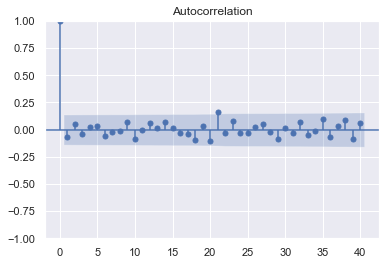

In [236]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()